## Model Training

In [1]:
# Import libraries for system configuration
import os 
import sys
sys.path.append("D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\model_development")

In [2]:
# import libraries for deep learning tasks
import tensorflow as tf 
from tensorflow.keras import layers, models 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import libraries for data processing and visualisation tasks
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# import dataset from image processing
from MobilePhoneDataset import MobileImageDataset

# import tools for model development tasks
from model_training_tools import data_preprocessing

Approach: 
+ Data Loading
+ Data Preparation
+ Model Building
+ Model Training
+ Model Packaging


## Data Loading and Preparing

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

+ Loading image data from MobileImageDataset-class
+ Resize the dataset and convert into tensors
+ Convert labels into numerical values using one-hot-encoding 
+ Create DataLoaders
+ Visualise Dataset

In [4]:
# Define mobile phone dataset
csv_file = "dataset.csv"
img_source_dir = "D:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\datasets\img_collection1"
mobile_data = MobileImageDataset(csv_file=csv_file, data_dir=img_source_dir)
mobile_df = mobile_data.data_name.drop(columns="Unnamed: 0", axis=1)
mobile_df

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\mian_\AppData\Local\Temp\ipykernel_11064\886653967.py:3: SyntaxWarning: invalid escape sequence '\M'
  img_source_dir = "D:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\datasets\img_collection1"


,Company,Image_file
0,Samsung,image_000.jpg
1,Samsung,image_001.jpg
2,Motorola,image_002.jpg
3,Xiaomi,image_003.jpg
4,Samsung,image_004.jpg
...,...,...
795,Nokia,image_795.jpg
796,Samsung,image_796.jpg
797,Nokia,image_797.jpg
798,Xiaomi,image_798.jpg


In [5]:
# Convert company labels to numerical data
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform='pandas')
company_ohe = ohe.fit_transform(mobile_df[["Company"]])
company_ohe.columns = [column.replace("Company_", "") for column in company_ohe.columns]
mobile_df = pd.concat([mobile_df, company_ohe], axis=1)
mobile_df.head()

,Company,Image_file,Apple,Microsoft,Motorola,Nokia,OnePlus,Poco,Redmi,Samsung,Xiaomi
0,Samsung,image_000.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Samsung,image_001.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Motorola,image_002.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Xiaomi,image_003.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Samsung,image_004.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Dataset (Size): 800


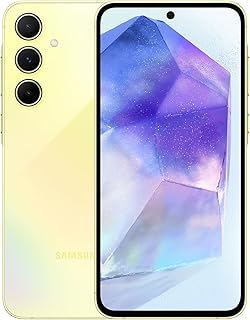

In [6]:
print(f"Dataset (Size): {mobile_data.len}")
mobile_data[1][0]

In [7]:
# Remove microsoft from dataset
mobile_df = mobile_df[mobile_df["Company"] != "Microsoft"] # at 379
mobile_df.index = [i for i in range(mobile_df.shape[0])]

# Create a dataframe with mobile phone images and its labels 
img_files = mobile_df["Image_file"]
class_names = mobile_df["Company"]

mp_data_registry = {
  "Image_paths": [os.path.join(img_source_dir, img_files.loc[idx]) for idx in range(mobile_df.shape[0])],
  "Class_names": [ class_names.loc[idx] for idx in range(mobile_df.shape[0])]
}

print(f"Image Path list: {mp_data_registry['Image_paths'][:2]}")
print(f"Class_names name list: {mp_data_registry["Class_names"][:2]}")

img_path_ds = pd.DataFrame(mp_data_registry)
img_path_ds.head()
print(f"Image Path Dataset(Size): {img_path_ds.shape}")

Image Path list: ['D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\datasets\\img_collection1\\image_000.jpg', 'D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\datasets\\img_collection1\\image_001.jpg']
Class_names name list: ['Samsung', 'Samsung']
Image Path Dataset(Size): (799, 2)


In [8]:
# Constants for resizing the images  
image_size = (330,330)
batch_size = 64

# loading and preprocessing image data
train_generator, test_generator = data_preprocessing(dataframe=img_path_ds, 
                                                     train_size=0.8,
                                                    img_size=image_size,
                                                    batch_size=batch_size,
                                                    rotation=30)


Found 639 validated image filenames belonging to 8 classes.
Found 160 validated image filenames belonging to 8 classes.
Shape of train images: (330, 330, 3)
Number of training samples: 639
Number of test samples: 160


In [9]:
# apply data augmentation on mobile phone images
# inspect the images with different degrees
def image_inspection(update_degrees: int, update_img_size: tuple, update_batch_size: int): 
  # re-augment the train and test images
  train_generator, test_generator = data_preprocessing(dataframe=img_path_ds,
                                                       train_size=0.8,
                                                    img_size=update_img_size,
                                                    batch_size=update_batch_size,
                                                    rotation=update_degrees)
  # get the images and labels 
  images, labels = next(train_generator)

  # get class indices from one-hot encoded labels
  class_indices = train_generator.class_indices
  class_names = {v:k for k, v in class_indices.items()}

  # convert one-hot labels to class indices
  label_indices = labels.argmax(axis=1)

  # plot a few examples
  plt.figure(figsize=(10, 10))
  for i in range(16):
    plt.subplot(4,4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[label_indices[i]])
    plt.axis('off')
  plt.show()

  return images, labels

In [10]:
# test case: image size and degrees for image rotation
rotations = [30, 20, 15, 10]
img_sizes = [(128, 128),(256, 256),(300,300),(315,315), (330,330)]

Found 639 validated image filenames belonging to 8 classes.
Found 160 validated image filenames belonging to 8 classes.
Shape of train images: (330, 330, 3)
Number of training samples: 639
Number of test samples: 160


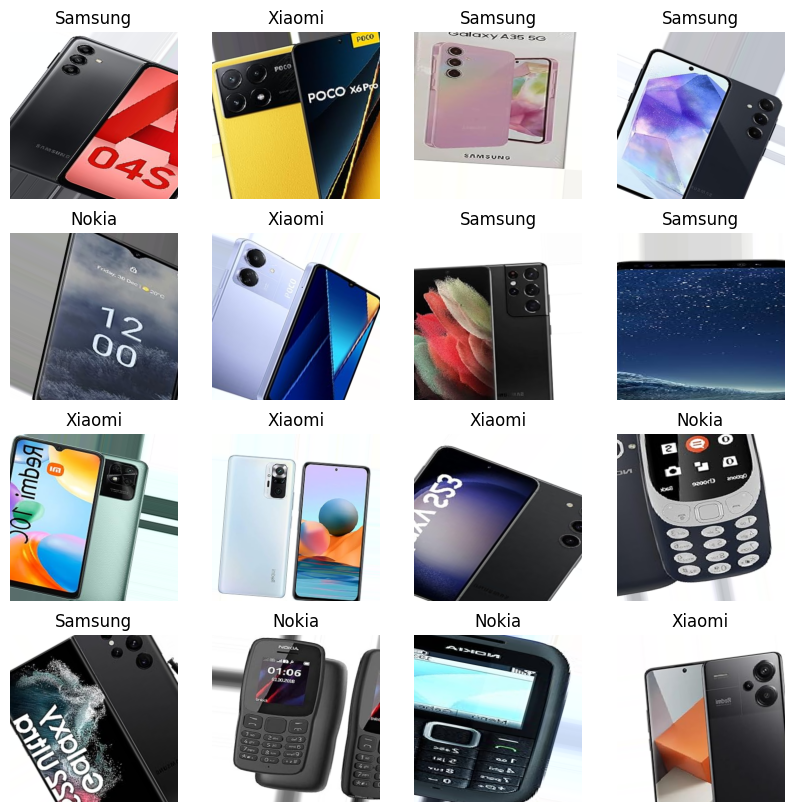

In [11]:
# inspect images with different rotation degrees
# image_inspection(degrees=20) # 20 degrees
images, labels = image_inspection(update_degrees=30, update_img_size=img_sizes[-1], update_batch_size=batch_size) # 30 degrees

## Model Development: DeepNeuralNet

In [12]:
from model_selection import DeepNeuralNet      # model without hyperparameter tuning
from model_selection import DeepNeuralNetHP    # model with hyperparameter tuning
import keras_tuner as kt

# import model training
from model_training_tools import model_training

Approach: Model Training

+ Model Building: DeepNeuralNet
+ Hyperparameter Tuning
+ Model Selection
+ Tran the model with Testing and Training data

## Model Building

In [13]:
# Define the model archtecture
mobile_label_num = labels.shape[-1]
in_rate = 0.4
model1 = DeepNeuralNet(input_shape=(330,330,3), brand_names=mobile_label_num, rate=0.4)

# Define optimizers and loss functions
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001)
loss1 = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# Compile the model
model1.compile(optimizer=optimizer1, loss=loss1, metrics=["accuracy"])

## Model Training

In [16]:
# Train the model: with batch_size = 64 and epochs = 10
model_hist1 = model_training(model=model1, 
                             training_set=train_generator, 
                             testing_set=test_generator,
                             epochs=10, 
                             batch_size=batch_size,
                             index=1)

d:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


d:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:593: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.2505 - loss: 2.0771 - val_accuracy: 0.4375 - val_loss: 1.6514
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.4288 - loss: 1.6110 - val_accuracy: 0.4375 - val_loss: 1.5923
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.4394 - loss: 1.5945 - val_accuracy: 0.4437 - val_loss: 1.5319
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.4549 - loss: 1.5786 - val_accuracy: 0.4375 - val_loss: 1.4850
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.4113 - loss: 1.5814 - val_accuracy: 0.4313 - val_loss: 1.5820
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.3905 - loss: 1.6265 - val_accuracy: 0.4500 - val_loss: 1.5165
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.4565 - loss: 1.5299 - val_accuracy: 0.4750 - val_loss: 1.4833
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.4622 - loss: 1.5225 - val_accuracy: 0.4750 - val_loss: 1.5035
Epo

In [15]:
# Train the model with model training loop: with batch_size = 128 and epochs = 12
model_hist12 = model_training_loop(model=model1,
                                   train_dataset=train_generator,
                                   val_dataset=test_generator,
                                   epochs=12)

Start of epoch 0


KeyboardInterrupt: 

In [15]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


## Model Building: Hyperparameter Tuning

In [ ]:
# Apply hyperparameter tuning
tuner = kt.Hyperband(model2.hyper_model, 
                     objective="val_accuracy",
                     max_epochs=10,)

model2 = DeepNeuealNetHP(input_shape=(330,330,3), brand_names=mobile_label_num, rate=0.4)

## Model Packaging

In [33]:
from tensorflow.keras.models import load_model

+ Save the model after training
+ Load one random mobile image for predicting the model
+ Predict the image with the model

Check later: save_model()

In [34]:
# save the model image
def save_model(model, model_name, input_path): 
  # define the constants: save a model
  model_file = f"mobile_recon_{model_name}.keras"
  model_path = os.path.join(input_path, model_file)
  
  # verify model successfully saved
  if os.path.exists(input_path):
    model.save(model_path)
    print("Model saved successfully!")
    print(f"Location: {model_path}")
  else:
      print("Model saving failed. Check the path.")
      print(f"Path: {model_path}")

In [35]:
path = "D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\models"
save_model(model=model1, 
           model_name="model1",
           input_path=path)

Model saved successfully!
Location: D:\Machine_Learning\Portfolio_Project_Machine_Learning\Mobile_Phone_Recognition\models\mobile_recon_model1.keras
